In [1]:
# Подгрузка библиотек

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import os

In [43]:

def get_info(folder):
    st = time.time()
    ls = os.listdir(folder)
    main_types = {'num':[], 'year':[], 'month':[], 'day':[], 'size':[], 'finished':[], 'VERDICT SIMPLE':[], 'VERDICT SEPARABLE':[], 'VERDICT AMBIGUOUS':[], 'TIME LIMIT EXTENDED':[]}
    for i in range(len(ls)):
        el = ls[i]
        fd = open(folder + '/' + el, 'r')
        try:
            date = int(fd.readline())   
            num = int(fd.readline())
            count = 0
            types = {}

            line = fd.readline()
            while line:
                if line[0] == '#':
                    count += 1
                    if line[2:-1] in types:
                        types[line[2:-1]] += 1
                    else:
                        types[line[2:-1]] = 1
                line = fd.readline()

            fd.close()

            dt = datetime.datetime.fromtimestamp(date)
            main_types['year'].append(dt.year)
            main_types['month'].append(dt.month)
            main_types['day'].append(dt.day)
            main_types['num'].append(el.split('_')[0])
            main_types['finished'].append(count == num) 
            main_types['size'].append(count)
            main_types['VERDICT SIMPLE'].append(types.get('VERDICT SIMPLE', 0))
            main_types['VERDICT SEPARABLE'].append(types.get('VERDICT SEPARABLE', 0))
            main_types['VERDICT AMBIGUOUS'].append(types.get('VERDICT AMBIGUOUS', 0))
            main_types['TIME LIMIT EXTENDED'].append(types.get('TIME LIMIT EXTENDED', 0))
        except:
            print(i, ls[i])
        
        print('\r', i, len(ls), (time.time() - st) * (len(ls) - i) / (i + 1), end = '')
    
    return pd.DataFrame(main_types)

In [44]:
df = get_info('output')

 75204 384088 308.9273016442739475205 335459_output.txt34 384088 333.4254157828973 320.4642127698038 384088 317.1312367347835 384088 310.3223074628520542806 384088 315.12370927240204384088 318.03819371202957
 216247 384088 173.41632908193606216248 335626_output.txt4456874726384088 303.64175796968465 301.74788892209534 289.23610971535084 288.33931168940217279.84713427868024268.7855780249603 255.81637213608792384088 253.07206820728422 244.72953566631338384088 239.7310223366161229.32921640091985 384088 220.884681403567186749 384088 203.3376398514412196.36122819104116
 384087 384088 0.00103983886277518469.595438034837124.54365812369774 119.88582877931448105.8015775713911 384088 98.60268383066708 384088 95.61214674790833307689 384088 79.21138779641888 384088 76.75424108184039384088 46.046596617068644348718 384088 36.73783809155907384088 34.69136747076841357527 384088 27.59873010658033 12.859561319161266

In [2]:
df.sort_values(['year', 'month', 'day'], inplace=True)

df = df.reset_index(drop=True)
df.to_csv('res.csv')

NameError: name 'df' is not defined

In [4]:
df = pd.read_csv('res.csv')

## ---------------------------------------------------

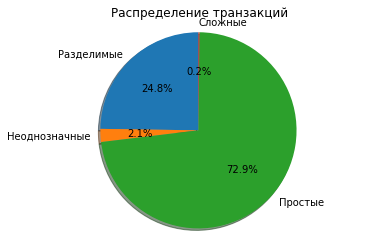

In [5]:
labels = ['Разделимые', 'Неоднозначные', 'Простые', 'Сложные']
sizes = [df['VERDICT SEPARABLE'].sum(), df['VERDICT AMBIGUOUS'].sum(), df['VERDICT SIMPLE'].sum(), df['TIME LIMIT EXTENDED'].sum()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Распределение транзакций')
plt.show()

In [6]:
groups = df.groupby(['year', 'month']).sum().reset_index()

date = (groups['year'].to_numpy() + (groups['month'] - 1) / 12)[:-2]
trans = {}
trans['Простые'] = groups['VERDICT SIMPLE'].to_numpy()[:-2]
trans['Разделимые'] = groups['VERDICT SEPARABLE'].to_numpy()[:-2]
trans['Неоднозначные'] = groups['VERDICT AMBIGUOUS'].to_numpy()[:-2]
trans['Сложные'] = groups['TIME LIMIT EXTENDED'].to_numpy()[:-2]
trans['Sum'] = groups['VERDICT SIMPLE'].to_numpy()[:-2] + groups['VERDICT SEPARABLE'].to_numpy()[:-2] + groups['VERDICT AMBIGUOUS'].to_numpy()[:-2] + groups['TIME LIMIT EXTENDED'].to_numpy()[:-2]
keys = list(trans.keys())

In [7]:
keys

['Простые', 'Разделимые', 'Неоднозначные', 'Сложные', 'Sum']

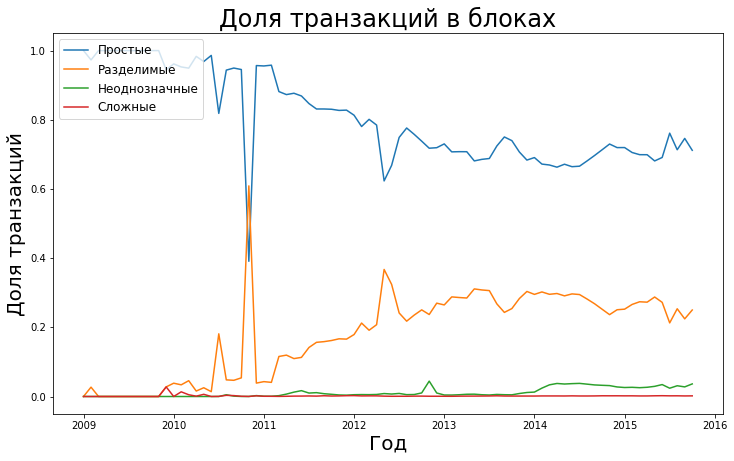

In [8]:
plt.figure(figsize=(12, 7))

for key in keys[:4]:    
    plt.plot(date, trans[key] / trans['Sum'], label = key)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Доля транзакций', fontsize = 20)
plt.title('Доля транзакций в блоках', fontsize = 24)
plt.legend(prop={'size': 12}, loc='upper left')
plt.show()

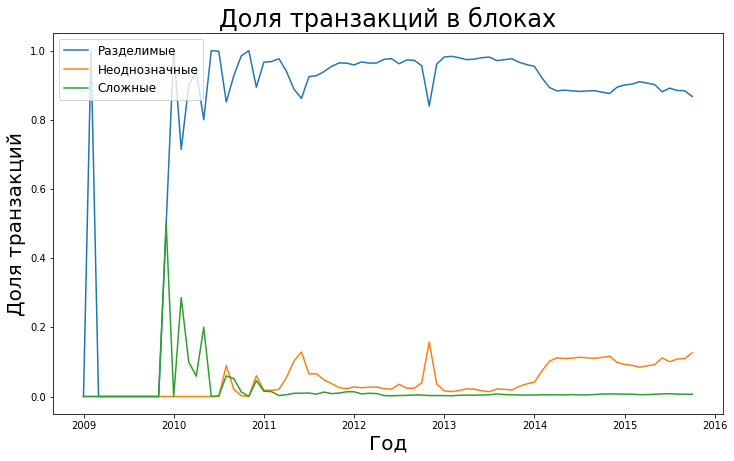

In [9]:
plt.figure(figsize=(12, 7))

for key in keys[1:4]:    
    plt.plot(date, trans[key] / (trans['Sum'] - trans['Простые'] + 0.0001), label = key)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Доля транзакций', fontsize = 20)
plt.title('Доля транзакций в блоках', fontsize = 24)
plt.legend(prop={'size': 12}, loc='upper left')
plt.show()

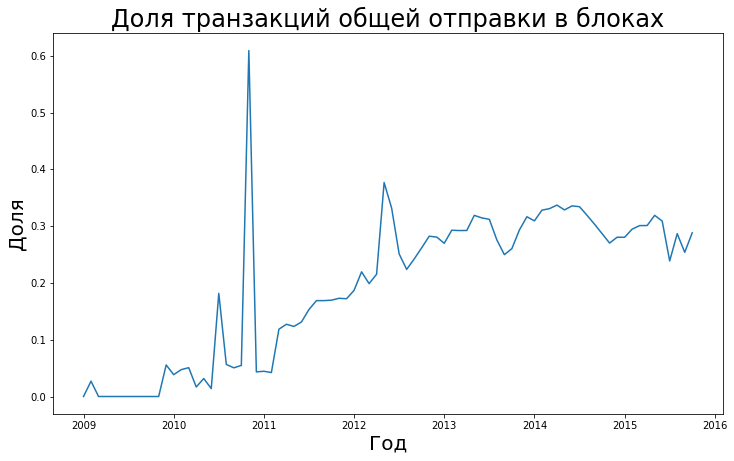

In [10]:
plt.figure(figsize=(12, 7))
   
plt.plot(date, 1 - trans['Простые'] / trans['Sum'], label = key)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Доля', fontsize = 20)
plt.title('Доля транзакций общей отправки в блоках', fontsize = 24)
#plt.legend(prop={'size': 12}, loc='upper left')
plt.show()

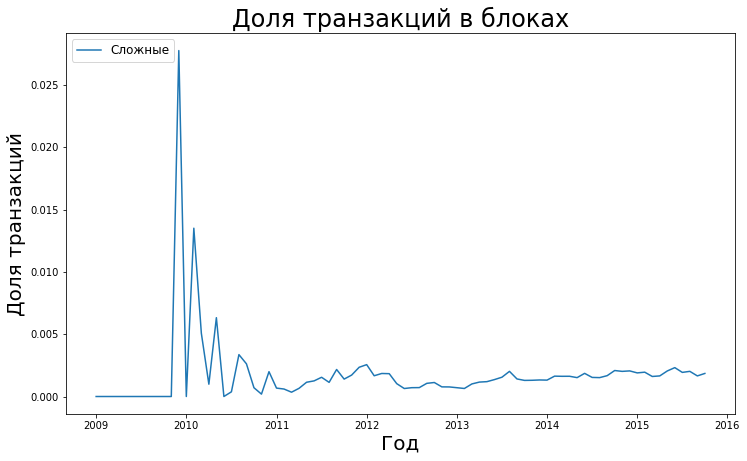

In [11]:
plt.figure(figsize=(12, 7))

for key in keys[3:4]:    
    plt.plot(date, trans[key] / trans['Sum'], label = key)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Доля транзакций', fontsize = 20)
plt.title('Доля транзакций в блоках', fontsize = 24)
plt.legend(prop={'size': 12}, loc='upper left')
plt.show()

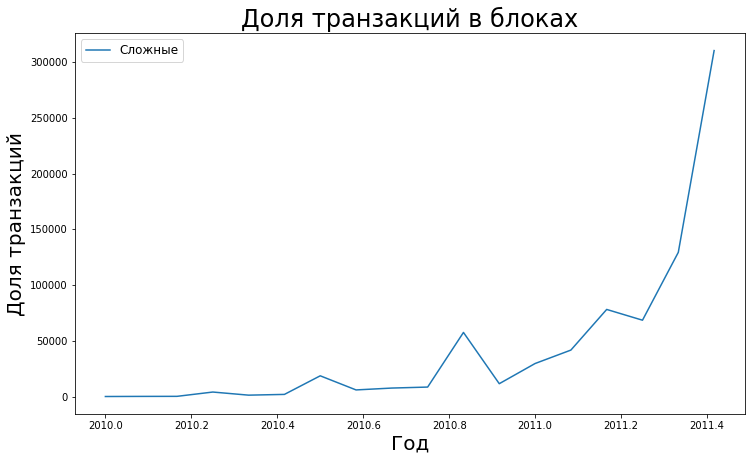

In [12]:
plt.figure(figsize=(12, 7))
 
plt.plot(date[12:30], trans['Sum'][12:30], label = key)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Доля транзакций', fontsize = 20)
plt.title('Доля транзакций в блоках', fontsize = 24)
plt.legend(prop={'size': 12}, loc='upper left')
plt.show()

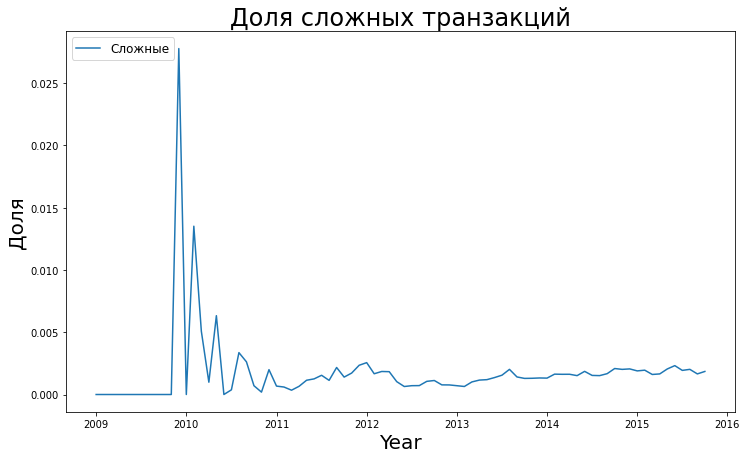

In [13]:
plt.figure(figsize=(12, 7))

for key in keys[3:4]:    
    plt.plot(date, trans[key] / trans['Sum'], label = key)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Доля', fontsize = 20)
plt.title('Доля сложных транзакций', fontsize = 24)
plt.legend(prop={'size': 12}, loc='upper left')
plt.show()

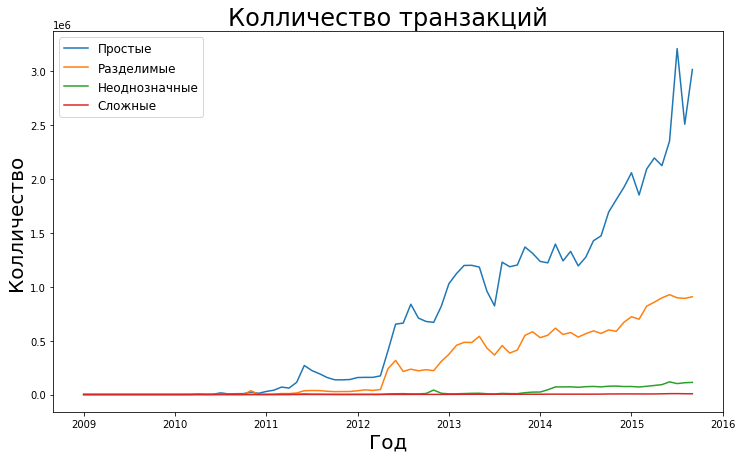

In [14]:
plt.figure(figsize=(12, 7))

for key in keys[:4]:    
    plt.plot(date[:-1], trans[key][:-1], label = key)

plt.xlabel('Год', fontsize = 20)
plt.ylabel('Колличество', fontsize = 20)
plt.title('Колличество транзакций', fontsize = 24)
plt.legend(prop={'size': 12}, loc='upper left')
plt.show()